# <b>Milestone 1

##<b>Problem Definition</b>

PLEASE LOOK INTO REPORT FOR MORE DETAILED ANWERS FOR THE BELOW QUESTIONS. 

**The context:** Why is this problem important to solve?<br>
Malaria is a life-threatening disease. Late diagnosis of Malaria and late treatment unfortunately can cause complications and could even be fatal. So, it is important to solve this problem and expedite malaria diagnosis and detection process because early and quick detection of malaria can not only expedite the start of the treatment but can also save lives. 

**The objectives:** What is the intended goal?<br>
The intended goal is to address the challenges in the existing system by automating the malaria detection process by using processes such as image processing, Machine Learning and Artificial Intelligence that can produce faster and efficient results.

**The key questions:** What are the key questions that need to be answered?<br>
•	How to distinguish between affected and unaffected cells?

•	As data scientists, how can we help the world to improve and speed up malaria diagnosis?

•	What will be the best way to automate the malaria detection process and which techniques can be used?

•	To properly train a program is to have the appropriate data. As this will involve image processing, do we have enough data, adequately labeled folders of each class to analyze. 

•	How can we test and improve our model to get the maximum accuracy?

•	How do we measure success of our model?

**The problem formulation:** What is it that we are trying to solve using data science?

Early and accurate malaria diagnosis and prompt treatment can cure a patient and save many lives by preventing severe malaria cases. The traditional malaria diagnosis requires human intervention, and its time-consuming process. Using data science, we are trying to address these challenges in the existing system by automating this process to get fasters and efficient results. Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have consistently shown higher accuracy than manual classification. It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms. As this problem involves images and is a classification problem, Convolutional Neural Network would be a great way to solve this problem as they are specially designed for image classification. 

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>
As this problem involves images and is a classification problem, Convolutional Neural Network would be a great way to solve this problem as they are specially designed for image classification. 


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print("Train Images Shape - ", train_images.shape)
print("Test Images Shaape - ", test_images.shape)

Train Images Shape -  (24958, 64, 64, 3)
Test Images Shaape -  (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels 
print("Train Labels Shape - ", train_labels.shape)
print("Test Labels Shaape - ", test_labels.shape)

Train Labels Shape -  (24958,)
Test Labels Shaape -  (2600,)


####<b> Observations and insights: _____
Train and Test Images: 
Here the data is stored in a 4-dimensional NumPy array. The first dimension  24958 is denoting the number of images in the training data  and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension 64 is denoting the number of pixels along the x-axis, the third dimension 64 is denoting the number of pixels along the y-axis, and the fourth dimension 3 is the total number of channels in those images, i.e., these are colored images consisting of RGB (Red, Green, and Blue) channels.
Similarly, Test Data has 2600 images. 

Train and Test Labels:
There are 24958 training lables and 2600 test labels. 


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
print("Pixel Value for Train images varies from ", np.min(train_images), "to ", np.max(train_images))
print("Pixel Value for Test images varies from ", np.min(test_images), "to ", np.max(test_images))



Pixel Value for Train images varies from  0 to  255
Pixel Value for Test images varies from  0 to  255


####<b> Observations and insights: _____
The Pixel values  for the train and test images ranges from 0 to 255. 



###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Try to use value_counts to count the values
train_labels_df = pd.DataFrame(train_labels)
test_labels_df = pd.DataFrame(test_labels)

print("Value counts for Train_Labels",'\n')
print(train_labels_df.value_counts())

print("\nValue counts for Test_Labels",'\n')
print(test_labels_df.value_counts())


Value counts for Train_Labels 

1    12582
0    12376
dtype: int64

Value counts for Test_Labels 

0    1300
1    1300
dtype: int64


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')




####<b> Observations and insights: _____
This will normalize the data to range from 0 t0 1. 
The train and test images   are of type float64, so by converting them to float32 it can help save memory. 

###<b> Plot to check if the data is balanced

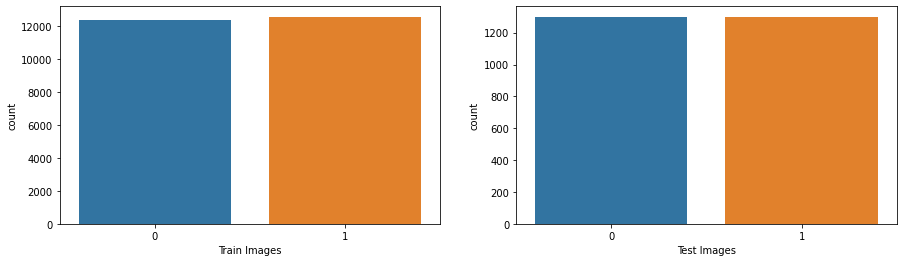

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
 
plt.figure(figsize= (15,4))  

plt.subplot(1, 2, 1)
sns.countplot(train_labels)
plt.xlabel("Train Images")

plt.subplot(1, 2, 2)         
sns.countplot(test_labels)
plt.xlabel("Test Images")

plt.show()
    
  


####<b> Observations and insights: _____
Train Dataset: Out of the 24958 in the train set, there are 12,582 (50.4%) parasitized images and the remaining 12,376 (49.6%) are uninfected cells. So, although its around 50% data in each class, it can be said that data is very close to balanced  but not exactly balanced. 
Test Dataset: Out of the 2600 images and labels, there is exactly 1300 parasitized and 1300 unaffected cells. Test data seems to be completely balanced for test. 


### <b>Data Exploration</b>
Let's visualize the images from the train data

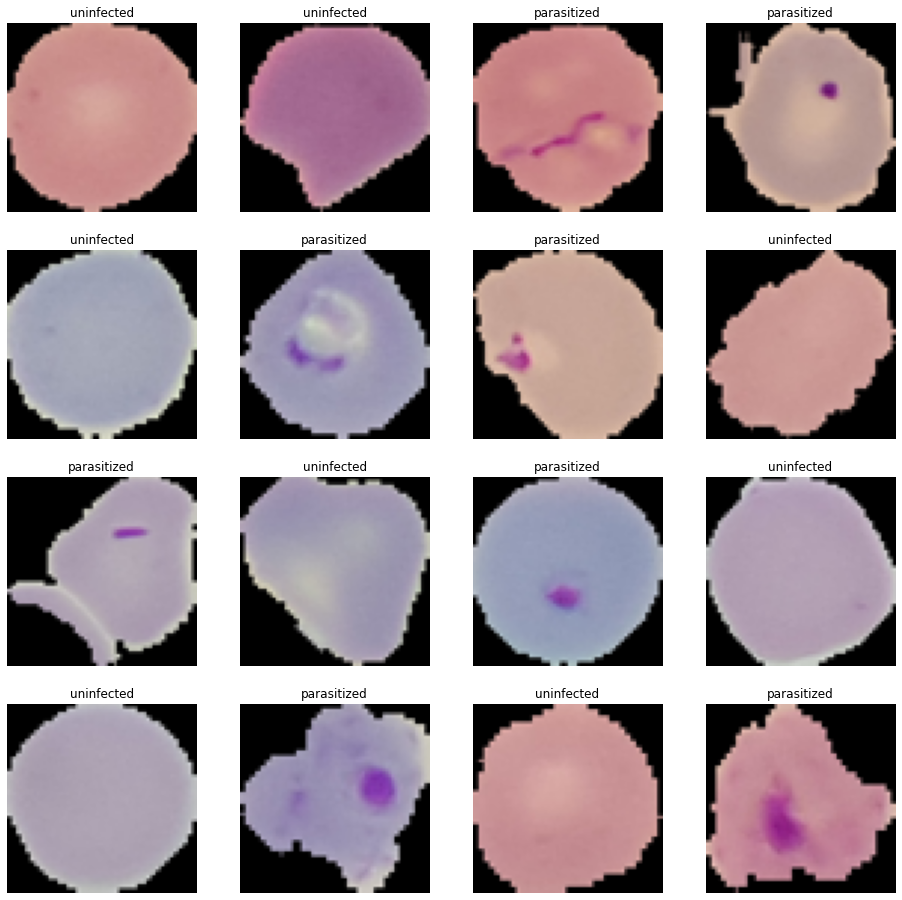

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: _____
Blood Cells  shown here are in different shades like purple, blue , pink. 
We need to look out for the dark pink stain spot in the blood cell. 
If that dark pink stain spot is present in the blood cell, it indicates that it is affected by the  Plasmodium parasite and hence its the parasitized cell. 
And if the dark pink stain spot is not present in the blood cell, it is not affected by the  Plasmodium parasite and hence its an uninfected cell. 


###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

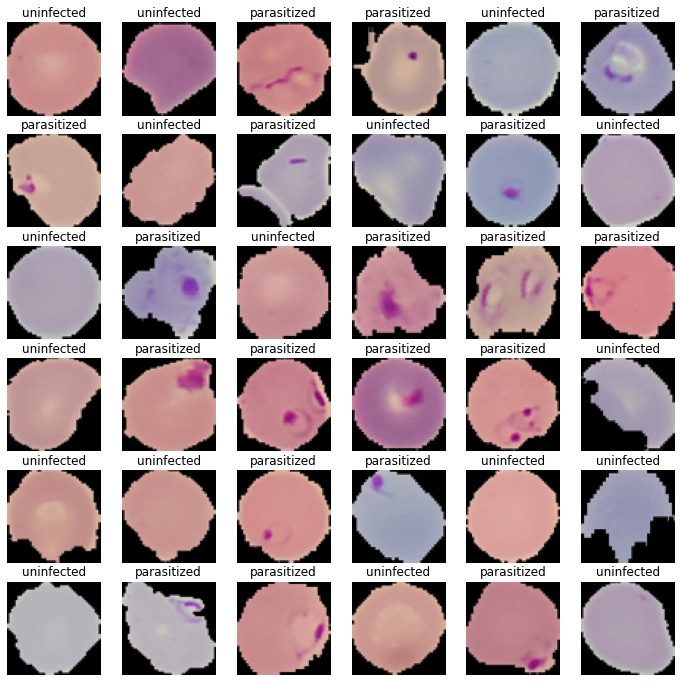

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')



####<b>Observations and insights:
As we have 6,6 subplot we iterated for 36 times starting from 1 to 36. 

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

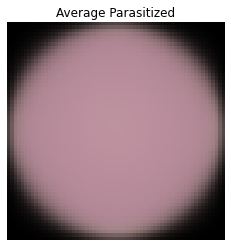

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

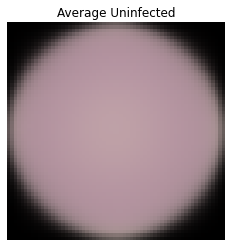

In [ ]:
# Similarly write the code to find the mean image of uninfected
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean



####<b> Observations and insights: _____
Mean Parasitizied Image looks darker than the mean uninfected image. And that does make sense as this could be due to the dark pink parasite stain present in the affected parasitizied blood cells. 


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

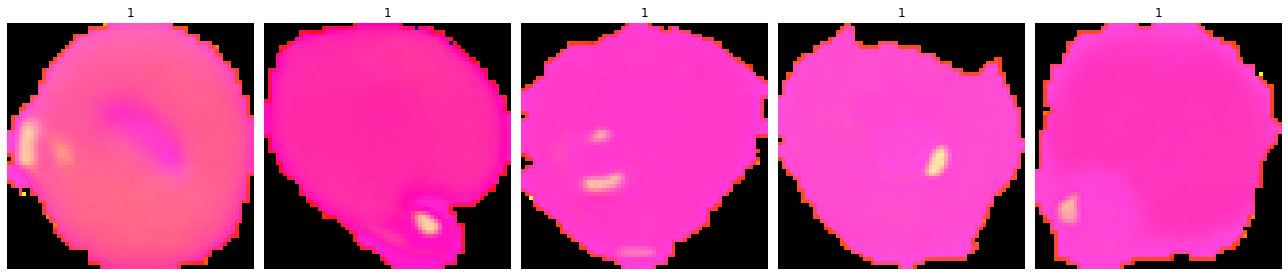

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [ ]:
# Similarly you can visualize for the images in the test data
gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)


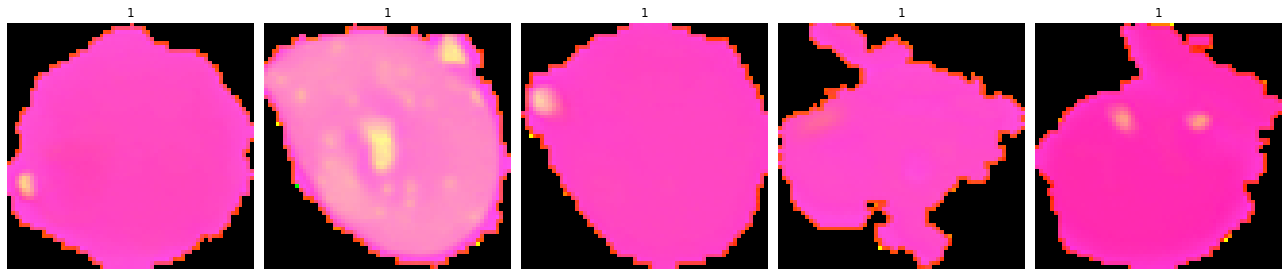

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: _____
IN HSV image the blood cell is definitely more clear than it is in RBG image. But the stain here is yellow vs dark pink in RGB and looks more clear  in RBG image. As the stain is more clear in RGB image, RGB image would be a better choice for input to the deep learning models.HSV could be better for human eye though. 

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

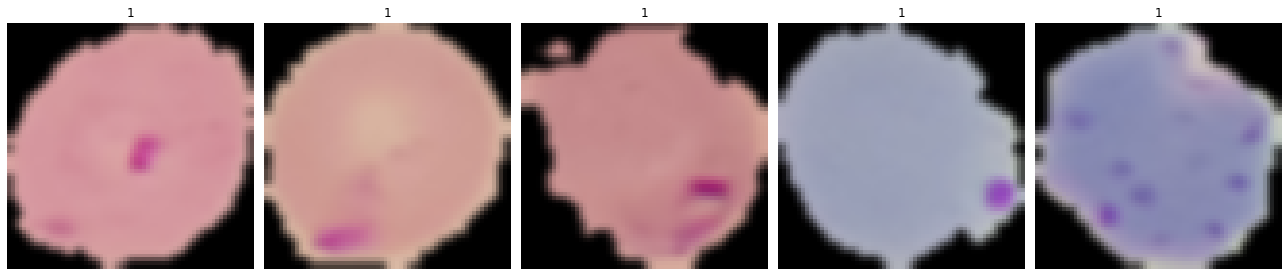

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

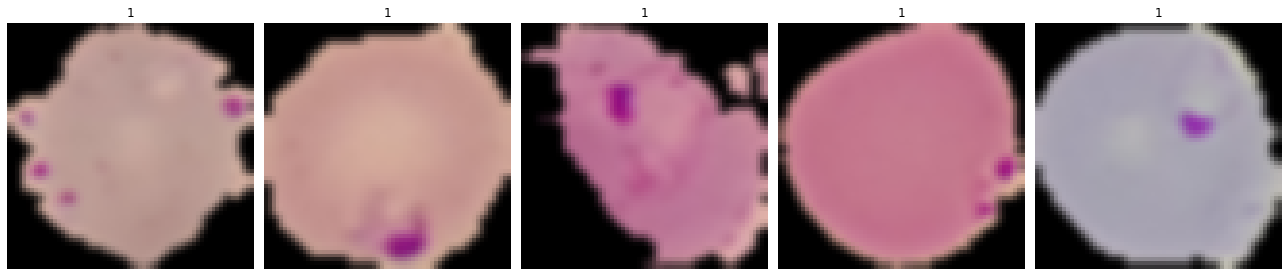

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: _____**
Although we can see the blood cells and stain in the Gaussian Blurring images but they are definitely not better than RGB or HSV images. So it would not help to use Guassian Blurring in Malaris Detection deep learning models. Also, due to the blurring it becomes difficult to distinguish whether its a real parasite strain or its just another impurity. 

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

Image classification and identification and feature extraction is a first very imporatant step for the deep learning model to classify and detect images. As the quality of the image really matters, Gaussian blurring would not help in the deep learning models to detect malaria and distinguish between parasitized and uninfected cells. 
Blurring would definitely be a good idea but on the images that are better for the models.Like we can use RGB images and perform data augmentation techniques like burring for example on them to increase our dataset size. This way it  will help in training the model and to reduce or avoid overfitting. 

## **Proposed approach**

PLEASE REFER TO THE REPORT FOR MORE DETAILED ANSWERS.

**Potential techniques:** What different techniques should be explored?<br>
As this problem involves images and is a classification problem, Convolutional Neural Network would be a great way to solve this problem as they are specially designed for image classification. Pleaserefer to the report for details. 

**Overall solution design:** What is the potential solution design?<br>
Overall potential solution design:
•	Use one of the pre-trained models (like VGG16 or VGG19) that are trained on ImageNet. Explore till what level this should be used. This will be the for the feature extraction of the images. 
•	Flatten the feature map and feed it into a fully connected neural network to generate the final predictions(classifications). 
•	Final output layer will use the Softmax function to predict the final output whether the image is parasitized or uninfected. 
•	Cross entropy should be minimized during training.
•	Recall, precision and accuracy should be produced to help determine the performance of the models and drive decision of model tuning steps.

**Measures of success:** What are the key measures of success to compare different techniques?<br>
Different techniques or models should be compared on basis of their performance parameters as key measures of success. Model performance will be evaluated on four different parameters: accuracy, precision, recall, and F1-score. But as we want to minimize the false negatives for malaria detection, recall score will be a very important factor here for success. But as precision is important too, F1-Score should be the measure of success for the performance of the model. 